In [ ]:
import baostock as bs
import pandas as pd

#### 登陆系统 ####
lg = bs.login()
# 显示登陆返回信息
print('login respond error_code:'+lg.error_code)
print('login respond  error_msg:'+lg.error_msg)

#### 获取沪深A股历史K线数据 ####
# 详细指标参数，参见“历史行情指标参数”章节；“分钟线”参数与“日线”参数不同。“分钟线”不包含指数。
# 分钟线指标：date,time,code,open,high,low,close,volume,amount,adjustflag
# 周月线指标：date,code,open,high,low,close,volume,amount,adjustflag,turn,pctChg
rs = bs.query_history_k_data_plus("sh.600000",
    "date,code,open,high,low,close,preclose,volume,amount,adjustflag,turn,tradestatus,pctChg,isST",
    start_date='2017-07-01', end_date='2017-12-31',
    frequency="d", adjustflag="3")
print('query_history_k_data_plus respond error_code:'+rs.error_code)
print('query_history_k_data_plus respond  error_msg:'+rs.error_msg)

#### 打印结果集 ####
data_list = []
while (rs.error_code == '0') & rs.next():
    # 获取一条记录，将记录合并在一起
    data_list.append(rs.get_row_data())
result = pd.DataFrame(data_list, columns=rs.fields)

#### 结果集输出到csv文件 ####   
result.to_csv("history_A_stock_k_data.csv", index=False)
print(result)

#### 登出系统 ####
bs.logout()

Index(['date', 'open', 'high', 'low', 'close', 'volume'], dtype='object')
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')
                 Date   Open   High    Low  Close    Volume
Date                                                       
2017-12-18 2017-12-18  12.71  12.71  12.61  12.65  13445648
2017-12-19 2017-12-19  12.65  12.76  12.62  12.75  18399603
2017-12-20 2017-12-20  12.76  12.76  12.60  12.73  26639844
2017-12-21 2017-12-21  12.67  12.78  12.60  12.70  21052388
2017-12-22 2017-12-22  12.68  12.72  12.61  12.62  16076938
2017-12-25 2017-12-25  12.61  12.68  12.56  12.59  19306662
2017-12-26 2017-12-26  12.57  12.66  12.56  12.64  15225722
2017-12-27 2017-12-27  12.65  12.66  12.53  12.62  32731881
2017-12-28 2017-12-28  12.60  12.66  12.53  12.54  23870824
2017-12-29 2017-12-29  12.52  12.62  12.51  12.59  16351826


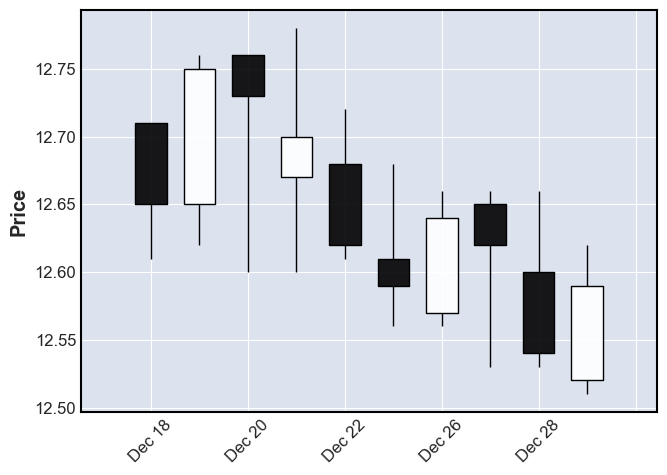

In [32]:
import mplfinance as mpf
import pandas as pd
import numpy as np

sh_pd = pd.read_csv("./history_A_stock_k_data.csv")
# print(sh_pd)
sh_new = sh_pd[['date','open','high','low','close','volume']]
print(sh_new.columns)
#设置索引
# sh_new = sh_new.set_index('date')
# sh_new = sh_new.set_index('date')
# mplfinance.plot(sh_new,type='line')
#修改列名
sh_new = sh_new.rename(columns={'date':'Date','open':'Open','high':'High',
                       'low':'Low','close':'Close','volume':'Volume'})
print(sh_new.columns)
sh_new['Date'] = pd.to_datetime(sh_new['Date'])
sh_new.index = pd.DatetimeIndex(sh_new['Date'])
# sh_ne
daily_some = pd.DataFrame(sh_new.tail(10))
print(daily_some)
mpf.plot(daily_some, type='candle')